STEP 1: DATASET LOADING AND VERIFICATION

Current working directory: C:\Users\shash\f1_ml

Contents of current directory:
['.ipynb_checkpoints', 'f1_analysis_results.png', 'formula1-world-championship-1950-2020', 'formula1_analysis.ipynb']

Attempting to load: formula1-world-championship-1950-2020\results.csv

SUCCESS: Dataset loaded successfully from:
C:\Users\shash\f1_ml\formula1-world-championship-1950-2020\results.csv

Dataset shape: (26759, 18)

STEP 2: DATA PREPROCESSING

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26759 entries, 0 to 26758
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   resultId         26759 non-null  int64  
 1   raceId           26759 non-null  int64  
 2   driverId         26759 non-null  int64  
 3   constructorId    26759 non-null  int64  
 4   number           26759 non-null  object 
 5   grid             26759 non-null  int64  
 6   position         2675

C:\Users\shash\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 2 out of 4 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
C:\Users\shash\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)



Regularized Statsmodels Results:
                           Logit Regression Results                           
Dep. Variable:              is_winner   No. Observations:                26759
Model:                          Logit   Df Residuals:                    26755
Method:                           MLE   Df Model:                            3
Date:                Mon, 31 Mar 2025   Pseudo R-squ.:                  0.9990
Time:                        17:32:35   Log-Likelihood:                -4.4899
converged:                       True   LL-Null:                       -4675.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -81.0006      6.188    -13.090      0.000     -93.129     -68.872
grid            -89.5694      6.817    -13.140      0.000    -102.930     -76.209
positi

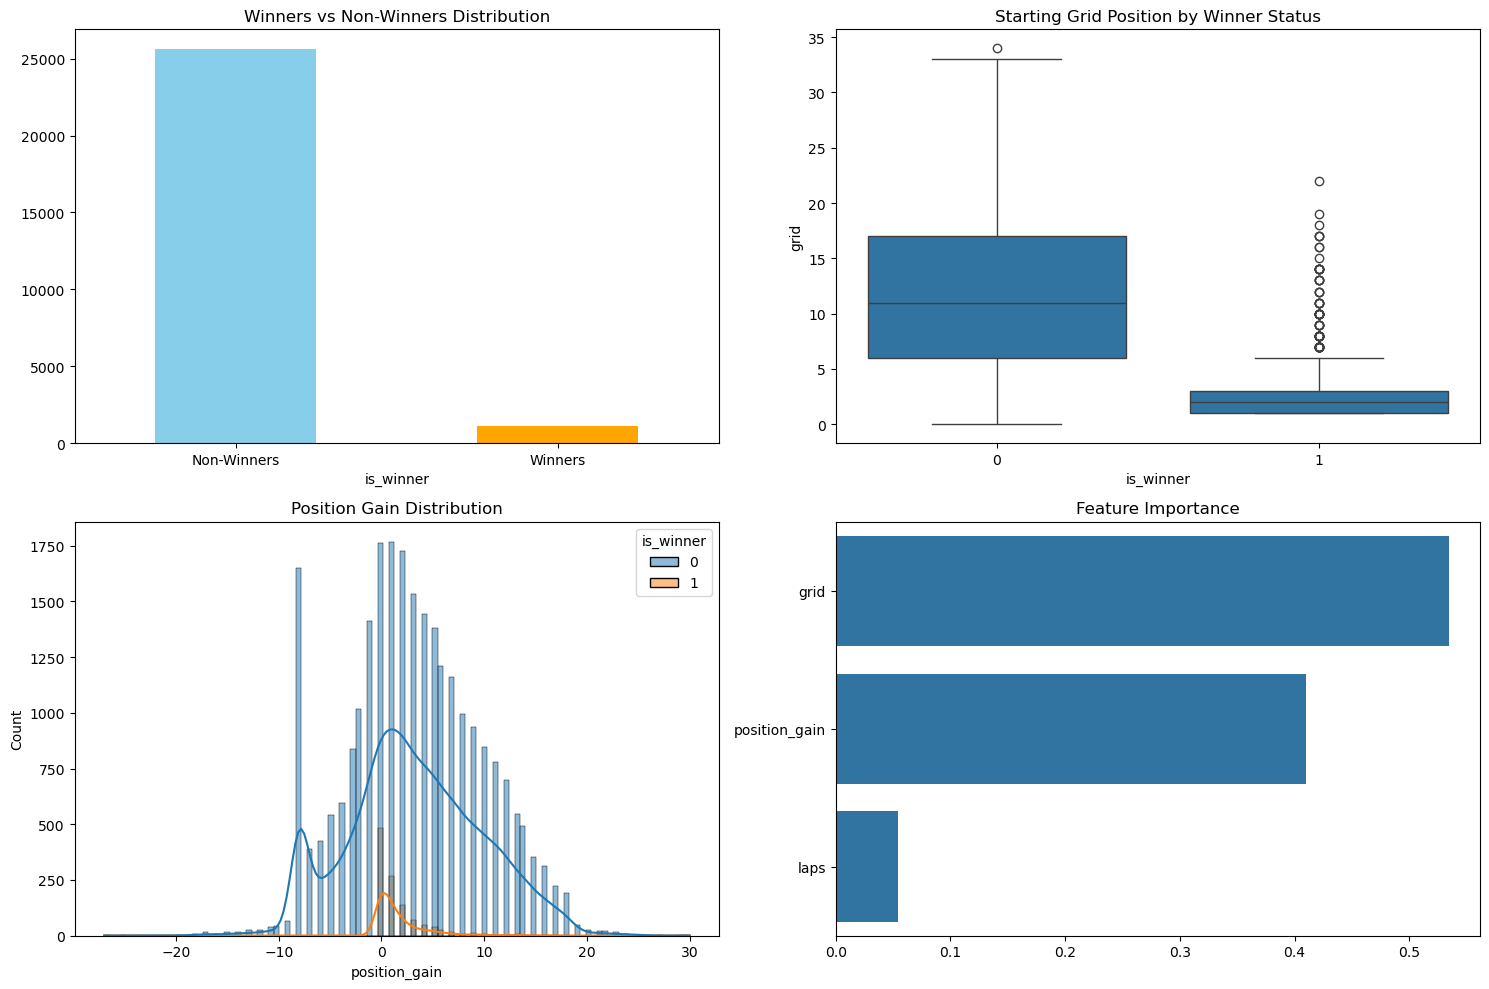


ANALYSIS COMPLETE! Results saved to 'f1_analysis_results.png'


In [11]:
# Formula 1 Race Data Analysis - Final Corrected Code
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import os

# ======================================================================
# 1. DATA LOADING WITH PATH VERIFICATION
# ======================================================================
print("="*50)
print("STEP 1: DATASET LOADING AND VERIFICATION")
print("="*50)

# Verify current directory structure
print("\nCurrent working directory:", os.getcwd())
print("\nContents of current directory:")
print(os.listdir())

# Define the correct path for your specific structure
dataset_folder = "formula1-world-championship-1950-2020"
main_data_file = "results.csv"
dataset_path = os.path.join(dataset_folder, main_data_file)

try:
    # Load the main dataset
    print(f"\nAttempting to load: {dataset_path}")
    df = pd.read_csv(dataset_path)
    
    # Verify successful load
    print("\nSUCCESS: Dataset loaded successfully from:")
    print(os.path.abspath(dataset_path))
    print(f"\nDataset shape: {df.shape}")
    
except FileNotFoundError:
    print("\nERROR: File not found at:", os.path.abspath(dataset_path))
    print("\nTROUBLESHOOTING:")
    print(f"1. Please verify the folder '{dataset_folder}' exists in the same directory as your notebook")
    print(f"2. Check that '{main_data_file}' exists in that folder")
    print("\nContents of dataset folder (if exists):")
    if os.path.exists(dataset_folder):
        print(os.listdir(dataset_folder))
    else:
        print("Dataset folder not found")
    exit()

# ======================================================================
# 2. DATA PREPROCESSING
# ======================================================================
print("\n" + "="*50)
print("STEP 2: DATA PREPROCESSING")
print("="*50)

# Display basic info
print("\nDataset Info:")
print(df.info())

# Handle missing values and data conversions
print("\nHandling missing values and data conversions...")

# Convert all numeric columns first
numeric_cols = ['position', 'grid', 'laps', 'points']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Fill missing values after conversion
df.fillna({'position': df['position'].median(),
           'points': 0,
           'grid': df['grid'].median(),
           'laps': df['laps'].median()}, inplace=True)

# Create target variable and features
df['is_winner'] = (df['position'] == 1).astype(int)
df['position_gain'] = df['grid'] - df['position']

# Handle any infinite values
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(subset=['grid', 'position_gain', 'laps'], inplace=True)

# Data validation checks
print("\nPost-processing data types:")
print(df[numeric_cols].dtypes)
print("\nMissing values after treatment:")
print(df[numeric_cols].isnull().sum())

# ======================================================================
# 3. STATISTICAL ANALYSIS
# ======================================================================
print("\n" + "="*50)
print("STEP 3: STATISTICAL ANALYSIS")
print("="*50)

# Scale features for numerical stability
scaler = StandardScaler()
features = ['grid', 'position_gain', 'laps']
X_scaled = scaler.fit_transform(df[features])
X_scaled_df = pd.DataFrame(X_scaled, columns=features)

try:
    # Statsmodels logistic regression with increased iterations and adjusted alpha value
    print("\nPerforming logistic regression analysis...")
    X_stats = X_scaled_df.copy()
    X_stats = sm.add_constant(X_stats)
    y_stats = df['is_winner']

    logit_model = sm.Logit(y_stats, X_stats)
    result = logit_model.fit_regularized(method='l1', alpha=0.1, maxiter=500)  # Increased maxiter and adjusted alpha
    
    print("\nRegularized Statsmodels Results:")
    print(result.summary())
except Exception as e:
    print(f"\nStatsmodels analysis error: {str(e)}")
    print("Using sklearn results instead.")

# ======================================================================
# 4. MACHINE LEARNING MODELING
# ======================================================================
print("\n" + "="*50)
print("STEP 4: MACHINE LEARNING MODELING")
print("="*50)

X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, df['is_winner'], test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("\nModel Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred)*100))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nFeature Importances:")
for feature, importance in zip(features, model.feature_importances_):
    print(f"{feature}: {importance:.2f}")

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
df['is_winner'].value_counts().plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Winners vs Non-Winners Distribution')
plt.xticks([0, 1], ['Non-Winners', 'Winners'], rotation=0)

plt.subplot(2, 2, 2)
sns.boxplot(x='is_winner', y='grid', data=df)
plt.title('Starting Grid Position by Winner Status')

plt.subplot(2, 2, 3)
sns.histplot(data=df, x='position_gain', hue='is_winner', kde=True)
plt.title('Position Gain Distribution')

plt.subplot(2, 2, 4)
sns.barplot(x=model.feature_importances_, y=features)
plt.title('Feature Importance')

plt.tight_layout()
plt.savefig('f1_analysis_results.png')
plt.show()

print("\nANALYSIS COMPLETE! Results saved to 'f1_analysis_results.png'")
